In [1]:
#pip install cmake

In [2]:
#pip install dlib

In [3]:
#pip install face_recognition

In [4]:
#pip install hdbscan

In [5]:
#import face_recognition
import cv2
from matplotlib import pyplot as plt
import numpy
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.spatial import distance
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import hdbscan

In [6]:
import face_recognition

In [7]:
sample_frequency = 50
marked_up_frames = []
cropped_faces = []
embeddings = []

vid = cv2.VideoCapture('MY DRUNK KITCHEN TRIBUTE.mp4')

In [8]:
count  = 0
while(vid.isOpened()):
    # Capture frame-by-frame
    ret, frame = vid.read()
    if ret == True:
        if (count % sample_frequency) == 0:
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            
            face_locations = face_recognition.face_locations(frame)#, model="cnn")
            face_encodings = face_recognition.face_encodings(frame, face_locations)
            
            for face in face_locations:
                cropped_faces.append(frame[face[0]:face[2], face[3]:face[1]].copy())
                
            for face in face_locations:
                cv2.rectangle(frame, (face[3], face[0]), (face[1], face[2]), (0, 0, 255), 4)
                
            embeddings = embeddings + face_encodings

            marked_up_frames.append(frame)
        count += 1
    else: 
        break

vid.release()

/var/folders/yg/0h48mfm11p9c6hc7zg_95s_40000ks/T/ipykernel_1826/166086844.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(5, 4, (i + 3)/3)


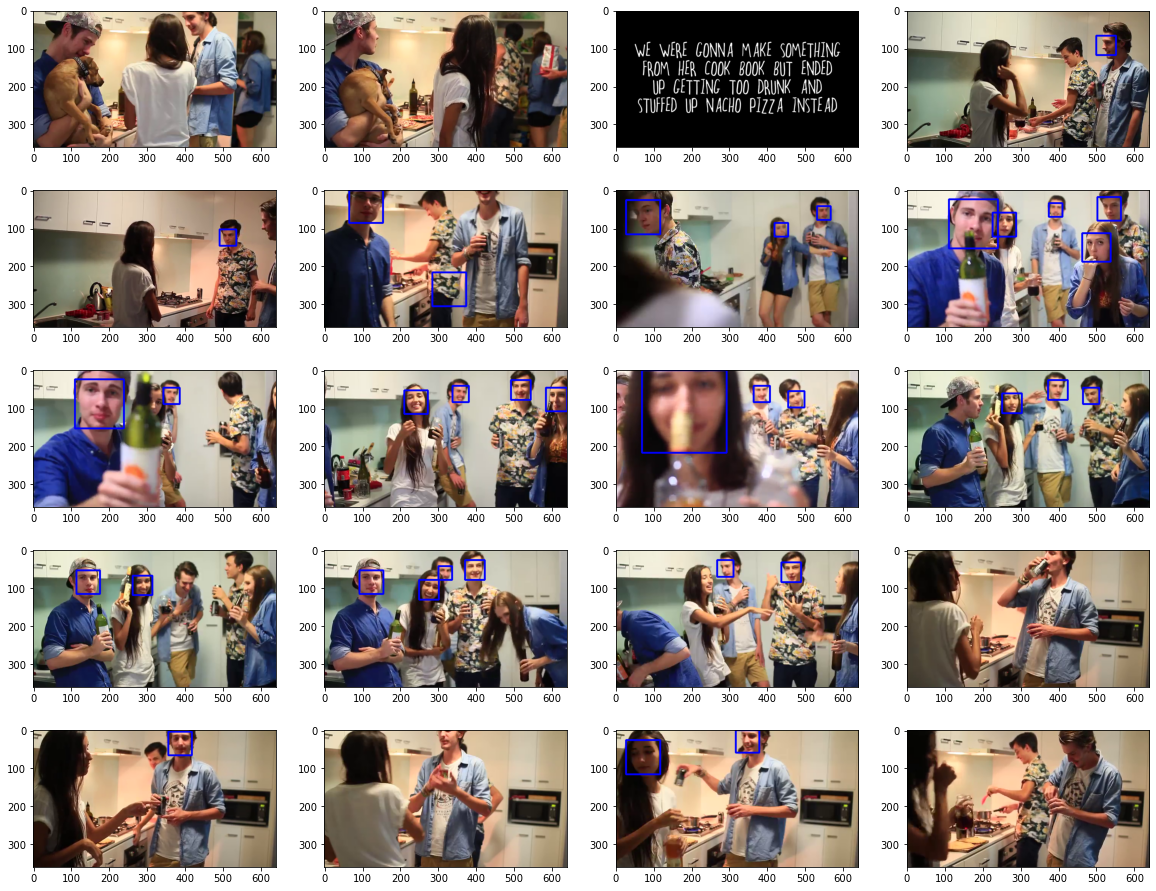

In [9]:
fig = plt.figure(figsize=[20, 16])
for i in range(0, 60, 3):
    ax = fig.add_subplot(5, 4, (i + 3)/3)
    ax.imshow(marked_up_frames[i]);

/var/folders/yg/0h48mfm11p9c6hc7zg_95s_40000ks/T/ipykernel_1826/1465925887.py:3: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  ax = fig.add_subplot(4, 6, (i + 2)/2)


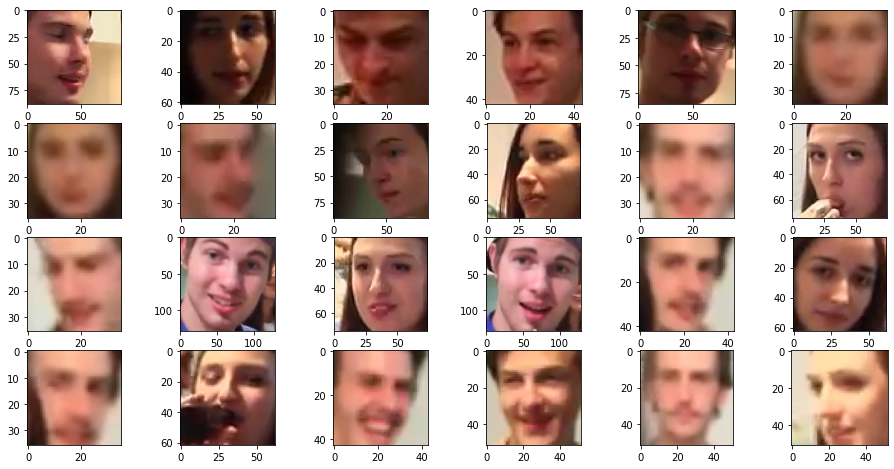

In [10]:
 fig = plt.figure(figsize=[16, 8])
for i in range(0, 48, 2):
    ax = fig.add_subplot(4, 6, (i + 2)/2)
    ax.imshow(cropped_faces[i]);

/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/user/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


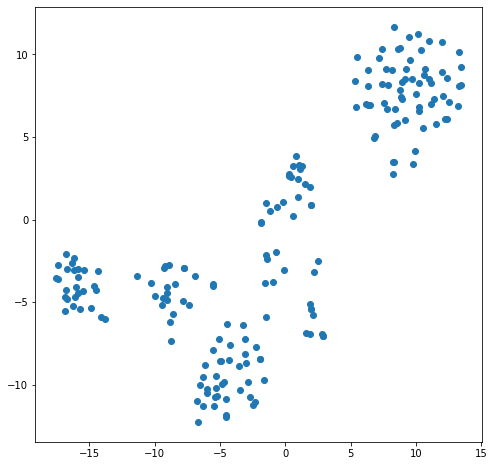

In [11]:
tsne_embeddings = TSNE(random_state=42).fit_transform(embeddings)
fig = plt.figure(figsize=[8, 8])
ax = fig.add_subplot(1, 1, 1)
ax.scatter(tsne_embeddings[:,0], tsne_embeddings[:,1]);

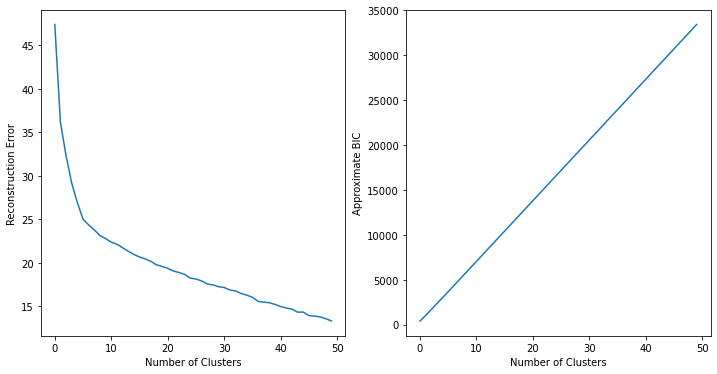

In [12]:
def compute_approximate_bic(kmeans,X):
    
    k = numpy.shape(kmeans.cluster_centers_)[0]*(numpy.shape(kmeans.cluster_centers_)[1] + 1)
    m = len(X)
    
    approx_bic = m*numpy.log(kmeans.inertia_ / m) + k*numpy.log(m)
    return approx_bic    

recon_error = []
bic = []

for i in range (50):
    kmeans = KMeans(n_clusters=(i+1), random_state=4).fit(embeddings)
    recon_error.append(kmeans.inertia_)
    bic.append(compute_approximate_bic(kmeans, numpy.array(embeddings)))

fig = plt.figure(figsize=[12, 6])
ax = fig.add_subplot(1, 2, 1)
ax.plot(recon_error)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Reconstruction Error');    

ax = fig.add_subplot(1, 2, 2)
ax.plot(bic)
ax.set_xlabel('Number of Clusters')
ax.set_ylabel('Approximate BIC');

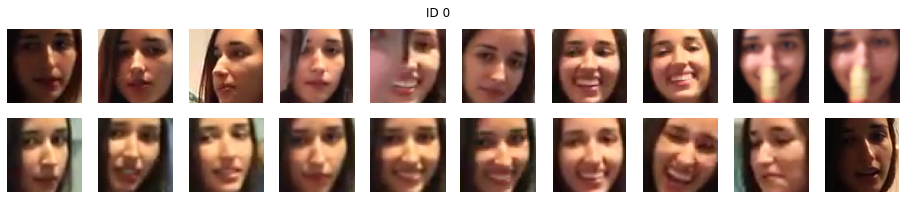

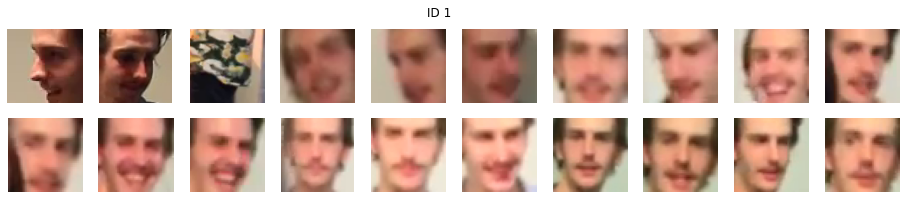

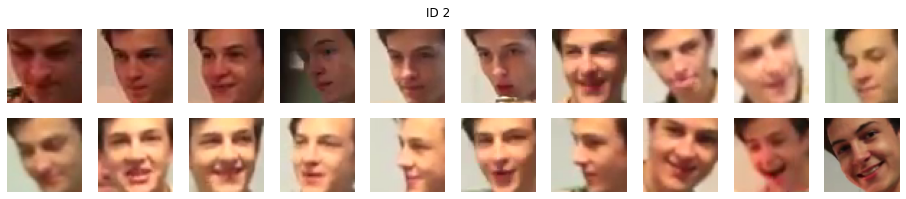

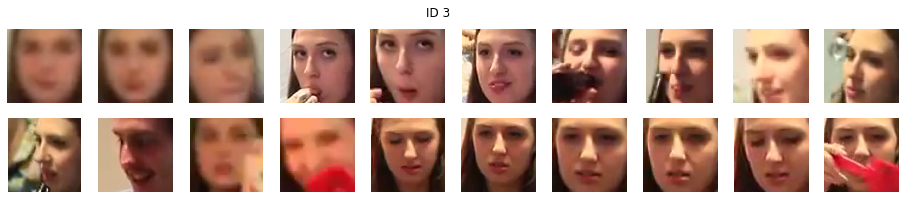

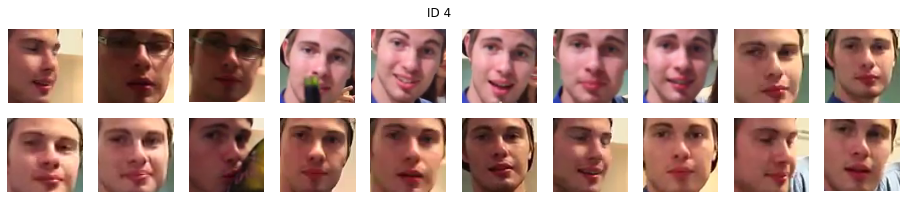

In [13]:
kmeans = KMeans(n_clusters=5, random_state=4).fit(embeddings)

def plot_faces(faces, labels):
    for face in (numpy.unique(labels)):
        fig = plt.figure(figsize=[16, 3])
        fig.suptitle('ID ' + str(face))
        indexes = [i for i,x in enumerate(labels) if x == face]
        for j in range(min(len(indexes), 20)):
            ax = fig.add_subplot(2, 10, j+1)
            ax.set_axis_off()
            ax.imshow(cropped_faces[indexes[j]]);
            
plot_faces(cropped_faces, kmeans.labels_)